# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras


Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import initializers
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


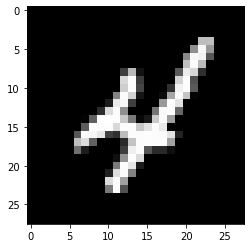

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[9], cmap='gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=None), input_shape=(28,28,1) ))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides=None))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(128, 3,3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3,3, activation='relu' ))
model.add(Convolution2D(10, (4,4)))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_initializer=<keras.ini..., input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/us

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 512)       1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 512)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 10)        5130      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 41s 679us/step - loss: 0.1355 - acc: 0.9588
Epoch 2/10
60000/60000 [==============================] - 33s 549us/step - loss: 0.0495 - acc: 0.9855
Epoch 3/10
60000/60000 [==============================] - 33s 547us/step - loss: 0.0369 - acc: 0.9887
Epoch 4/10
60000/60000 [==============================] - 33s 550us/step - loss: 0.0307 - acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0230 - acc: 0.9931
Epoch 6/10
60000/60000 [==============================] - 33s 547us/step - loss: 0.0210 - acc: 0.9934
Epoch 7/10
60000/60000 [==============================] - 33s 556us/step - loss: 0.0168 - acc: 0.9947
Epoch 8/10
60000/60000 [==============================] - 33s 547us/step - loss: 0.0156 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 33s 551us/step - loss: 0

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.03190068730094181, 0.9924]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.6020422e-16 1.0321661e-12 3.0592404e-10 1.9000326e-10 7.8399030e-16
  1.7319089e-16 1.4489710e-22 1.0000000e+00 1.1581499e-15 2.2961815e-11]
 [5.1602108e-12 1.1867653e-13 1.0000000e+00 1.7939146e-15 7.2000110e-12
  7.4144321e-17 1.0354256e-08 3.6673467e-16 2.6551346e-12 1.3888392e-15]
 [4.3612780e-10 9.9999952e-01 1.0279162e-08 7.9249274e-10 3.8481136e-08
  1.4224334e-07 8.1316003e-08 1.1488367e-07 6.1809700e-08 1.1546152e-09]
 [1.0000000e+00 2.7387672e-14 3.8731583e-12 3.0841252e-12 1.8090194e-11
  8.8341313e-12 4.4709960e-09 2.0926177e-13 5.8858605e-14 4.8768269e-09]
 [2.2071628e-11 1.3605273e-12 5.5747708e-13 9.1120173e-16 9.9999988e-01
  2.0603463e-10 8.4240687e-13 1.4975500e-13 2.5794987e-12 6.8773261e-08]
 [3.1026764e-11 9.9999988e-01 6.8393646e-08 1.2671287e-11 8.2248937e-09
  1.5019439e-09 1.3389637e-09 4.1789939e-08 6.6009633e-09 2.4907890e-11]
 [2.5954611e-14 4.4916138e-08 9.9320541e-10 8.5144239e-11 9.9999976e-01
  2.9695184e-11 4.4235838e-14 1.2637761e-07 3.7970562e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

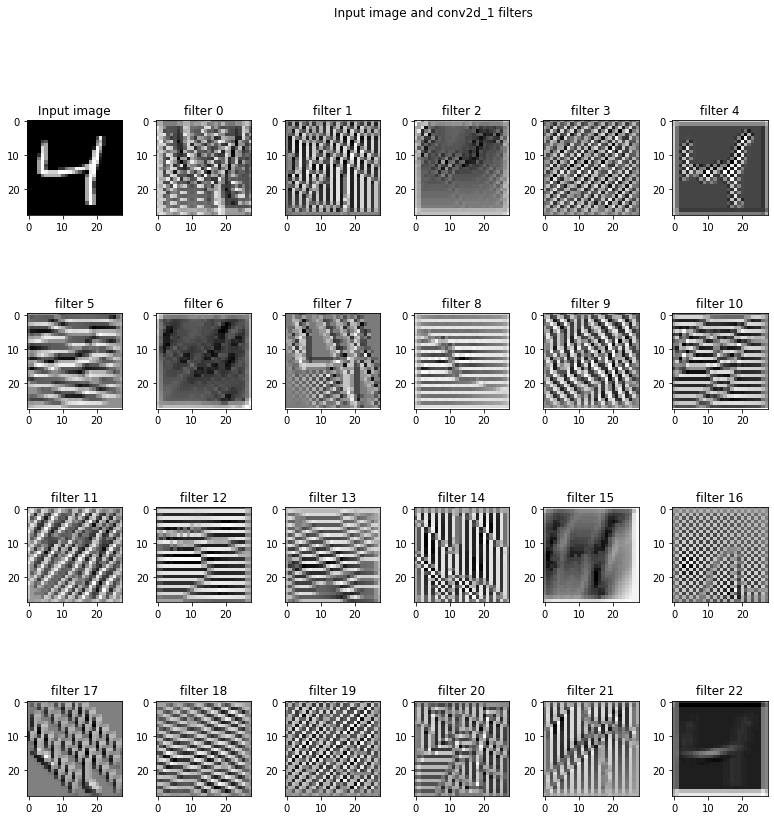

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()